(unit4.1)=
# Unit 4.1: The Laplace Transformation

The preparatory reading for this section is [Chapter 2](https://ebookcentral.proquest.com/lib/swansea-ebooks/reader.action?docID=3384197&ppg=43) of  {cite}`karris` and [Chapter 3]() of {cite}`schaum`.

Follow along at [cpjobling.github.io/eg-150-textbook//laplace_transform/1/laplace](https://cpjobling.github.io/eg-150-textbook/laplace_transform/1/laplace)

![QR Code for this lecture](pictures/qrcode_laplace.png)

## Agenda

* {ref}`laplace:laplace`

* {ref}`laplace:matlab`

* {ref}`laplace:roc`

* {ref}`laplace:pops_roc`

* {ref}`laplace:pandz`

* {ref}`laplace:examples`

(laplace:laplace)=
## The Laplace Transform

In {ref}`eigenfunctions_of_continuous_time_LTI_systems` we saw that for a continuous-time LTI system with impulse response $h(t)$, the output of the system in response to a complex input of the form $x(t)=e^{st}$ is

$$y(t) = \mathbf{T}\left\{x(t)\right\} = H(s)e^{st}$$

where

$$H(s) = \int_{-\infty}^{\infty}h(t)e^{-st}\,dt$$

(laplace:definition)=

### Definition

The function $H(s)$ above is referred to as the Laplace transform of $h(t)$.

For a general continuous-time signal $x(t)$, the Laplace transform $X(s)$ is defined as

$$X(s) = \int_{-\infty}^{\infty}x(t)e^{-st}\,dt$$

The variable $s$ is generally complex valued and is expressed as

$$\sigma + j\omega$$

The Laplace transform defined above is often called the *bilateral* (or *two-sided*) Laplace transform in contrast the the *unilateral* (or *one-sided*) Laplace transform which is defined as

$$X_I(s) = \int_{0^-}^{\infty}x(t)e^{-st}\,dt$$

where $0^-=\lim_{\epsilon\to 0}(0-\epsilon)$.

Clearly the bilateral and unilateral tranforms are equivalent only if $x(t)=0$ for $t\lt 0$.

In this course, because we are dealing with causal signals and systems, we will be concerned only with unilateral Laplace transform.

The laplace tranform equation is sometimes considered an operator that transforms a signal $x(t)$ into a function $X(s)$ represented symbolically as

$$X(s) = \mathcal{L}\left\{x(t)\right\}$$

and the signal $x(t)$ and its Laplace transform $X(s)$ are said to form a Laplace transform pair denoted as

$$x(t)\Leftrightarrow X(s)$$

Laplace transform pairs are tabulated ({doc}`lt_table.md`) for ease of reference.

```{note}
By convention, lower-case symbols are used for continuous-time signals and uppercase symbols for their Laplace tranforms.
```

(laplace:matlab)=
### MATLAB Representation

The Laplace transform operator is provided in the MATLAB symbolic math toolkit by the function `laplace` and can be used as follows:

In [1]:
format compact
syms s t x(t) % define Laplace transform variable and time as symbols
X(s) = laplace(x(t))

X(s) =


laplace(x(t), t, s)


(laplace:roc)=
## Region of Convergence

For a Laplace transfomation to exist, the integral must be bounded. That is
$$\left| {\int_0^\infty  {f(t){e^{ - st}}dt} } \right| < \infty $$

The range of values for the complex variables $s$ for which the Laplace tranform converges is called the *region of convergence* (ROC). To illustrate this concept, let us consider some examples.

(laplace:ex1)=
### Solved Problem 1

Consider the signal

$$x(t) = e^{-at}u_0(t)\quad a\, \mathrm{real}$$

#### By hand

We will work through the analysis in class

#### MATLAB analysis

In [2]:
% set up
syms s t a
assume(a,'real')
u0(t) = heaviside(t);

In [3]:
x(t) = exp(-a*t)*u0(t)

x(t) =


exp(-a*t)*heaviside(t)


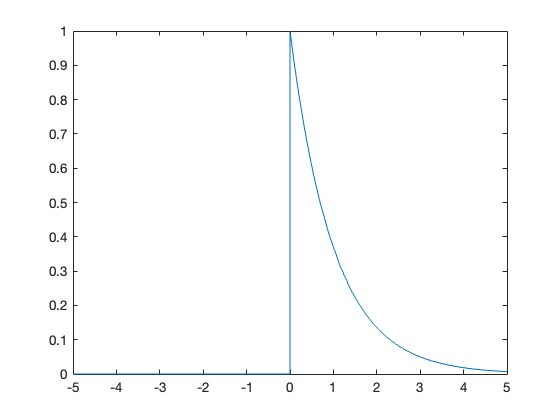

In [4]:
fplot(subs(x(t),a,1))

In [5]:
int(x(t)*exp(-s*t),t,0,inf)

ans =


piecewise(in(s, 'real') & a + s < 0, Inf, ~in(s, 'real') & a + real(s) ~= 0, 1/(a + s) - limit(exp(- t*a - t*s), t, Inf)/(a + s), in(s, 'real') & 0 < a + s | angle(s) in Dom::Interval(-pi/2, pi/2) & 0 < a & s ~= 0, 1/(a + s), (in(s, 'real') | a + real(s) == 0) & (~in(s, 'real') | 0 <= a + s) & (~in(s, 'real') | a + s <= 0) & (~angle(s) in Dom::Interval(-pi/2, pi/2) | a <= 0 | s == 0), int(exp(-t*a)*exp(-t*s), t, 0, Inf))


In [6]:
assume(s + a > 0)

In [7]:
int(x(t)*exp(-s*t),t,0,inf)

ans =


1/(a + s)


In [8]:
X(s) = laplace(x(t))

X(s) =


1/(a + s)


The Laplace transform of $x(t)$

$$X(s)=\int_{-\infty}^{\infty}e^{-at}u_0(t)e^{-st}\,dt = \int_{0^+}^{\infty}e^{-(s+a)t}\,dt$$

$$X(s) = \left.-\frac{1}{s+a}e^{-(s+a)t}\right|_{0^+}^\infty=\frac{1}{s+a}\quad \mathrm{Re}(s)> -a$$

:::{figure-md} ROC1
<img src="pictures/roc1.png" alt="ROC for Example 1" width="60%">

ROC for Example 1
:::

because $\lim_{t\to \infty}e^{-(s+a)t} = 0$ only if $\mathrm{Re}(s + a)\gt 0$ or $\mathrm{Re}(s)\gt -a$.

Thus, the ROC for {ref}`laplace:ex1` for {ref}`laplace:ex1` is specified as $\mathrm{Re}(s)\gt -a$ and is illustrated in the complex plane as showm in {numref}`ROC2` by the shaded area to the right of the line $\mathrm{Re}(s)=-a.

In Laplace transform applications, the complex plane is commonly referred to as the s-plane. The horizontal and vertical axes are sometimes referred to as the $\sigma$-axis ($\mathrm{Re}(s)$) and the $j\omega$-axis ($\mathrm{Im}(s)$), respectively.

(laplace:ex2)=
### Solved Problem 2

Consider the signal

$$x(t) = -e^{-at}u_0(-t)\quad a\, \mathrm{real}$$

#### MATLAB Analysis

We will work through the analysis in class

In [9]:
x(t) = -exp(-a*t)*u0(-t)

x(t) =


-heaviside(-t)*exp(-a*t)


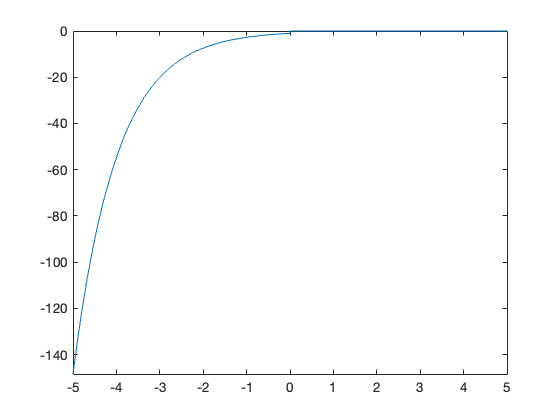

In [10]:
fplot(subs(x(t),a,1))

In [11]:
int(x(t)*exp(-s*t),t,-inf,0)

ans =


-Inf


In [12]:
X(s)=laplace(x(t))

X(s) =


0


In [13]:
assume(s + a < 0)
int(x(t)*exp(-s*t),t,-inf,0)

ans =


1/(a + s)


#### By hand analysis

See {ref}`ex9.`

Its Laplace transform $X(s)$ is given by {ref}`ex:9.1`



$$X(s)=\frac{1}{s+a}\quad \mathrm{Re}(s)\lt -a$$

Thus the ROC for {ref}`laplace:ex2` is specified as $\mathrm{Re}(s)\lt -a$ and is illustrated in the complex plane as showm in {numref}`ROC2` by the shaded area to the left of the line $\mathrm{Re}(s)=-a$.

:::{figure-md} ROC2
<img src="pictures/roc2.png" alt="ROC for Example 2" width="60%">

ROC for Example 2
:::

Comparing the results of {ref}`laplace:ex1` and {ref}`laplace:ex2`, we see that that algebraic expressions for $X(s)$ for these two signals are identical apart from the ROCs.

Therefore, in order for the Laplace transform to be unique for each signal $x(t)$, *the ROC must be specified as part of the transform*.

(laplace:pandz)=
## Poles and Zeros of X(s)

Usually, $X(s)$ will be a rational polynomial in $s$; that is

$$X(s)=\frac{b_ms^m+b_{m-1}s^{m-1}+\cdots b_1s + b_0}{a_ns^n+a_{n-1}s^{n-1}+\cdot a_1s + a_0}=\frac{b_m}{a_n}\,\frac{\left(s-z_1\right)\cdots\left(s-z_m\right)}{\left(s-p_1\right)\cdots\left(s-p_n\right)}$$

The coefficients $b_k$ and $a_k$ are real constants, and $k$, $m$ and $n$ are positive integers.

The transform $X(s)$ is called a *proper* rational function if $n>m$, and an *improper* rational function if $n\le m$.

The roots of the numerator polynomial, $z_k$, are called the *zeros* of $X(s)$ because $X(s) = 0$ for those values of $s$.

Similarly, the zeros of the denominator polynomial, $p_k$, are called the *poles* of $X(s)$ because $X(s)$ is infinite for those values of $s$.

Therefore, the poles of $X(s)$ lie outside the ROC since, by definition, $X(s)$ does not converge on the poles.

The zeros, on the other hand, may lie inside or outside the ROC.

Except for the scale factor $b_m/a_n$, $X(s)$ can be completely specified by its poles and zeros.

Thus a very compact representation of $X(s)$ is the s-plane is to show the locations of the poles and zeros in addition to the ROC.

Traditionally, an "x" is used to indicate each pole and a "o" is used to indicate each zero.

This is illustrated in {numref}`laplace:pzmap` for $X(s)$ given by

$$X(s) = \frac{2s+4}{s^2+4s+3} = 2 \frac{(s+2)}{(s+1)(s+3)}\quad \mathrm{Re}(s)\gt -1$$

:::{figure-md} Laplace:pzmap
<img src="pictures/pzmap.png" alt="s-plane representation of X(s)=(2s^2+4)(s^2+4s+3)" width="60%">

s-plane representation of $X(s)=(2s^2+4)/(s^2+4s+3)$
:::

#### MATLAB Analysis

In MATLAB we represent polynomials as vectors whose elements are the numerical values of the coeffients in decending order of $s$:

In [14]:
n = [2 4]; d = [1 4 3];

We factorise using function `roots` which determines the zeros of the polynomials:

In [15]:
z = roots(n), p = roots(d), k = 2;

z =
    -2


p =
    -3
    -1


We can plot these on the $s$-plane using the function `pzmap`:

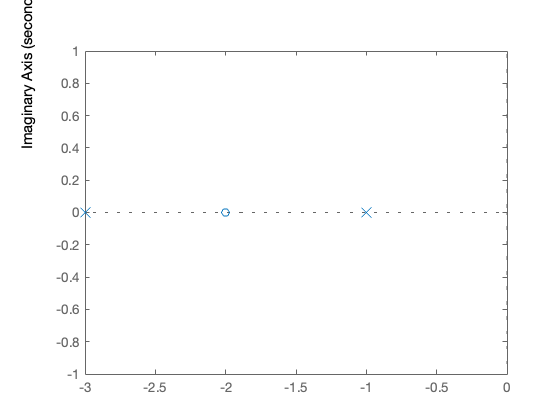

In [16]:
pzmap(p,z)

Note that $X(s)$ has one zero at $s=-2$ and two poles at $s=-1$ and $s=-3$ with scale factor 2. The ROC is $\mathrm{Re}(s)>-1$.

(laplace:pops_roc)=
## Properties of the ROC

[not examinable]

The properties of the ROC are summarised in **Section 3.1 D** of {ref}`schaum` and as they are ***not examinable***, we leave their study to the interested student.

(laplace:examples)=
## Examples 9



(ex9.1)=
### Example 9.1

Find the Laplace transform of

a). $x(t)=-e^{-at}u_0(-t)$

b). $x(t)= e^{at}u_0(-t)$

### Solution

a) 

$$X(s) = -\int_{-\infty}^{\infty}e^{-at}u_o(-t)e^{-st}\,dt=-\int_{-\infty}^{0^{-}}e^{-(s+a)t}$$

$$X(s) = \left.\frac{1}{s+a}e^{-(s+a)t}\right|_{-\infty}^{0^{-}}=\frac{1}{s+a}\quad\mathrm{Re}(s)\lt-a$$

Thus we obtain

$$-e^{-at}u_0(-t) \Leftrightarrow\frac{1}{s+a}\quad\mathrm{Re}(s)\lt-a$$

b). Similarly

$$X(s) = \int_{-\infty}^{\infty}e^{at}u_o(-t)e^{-st}\,dt=-\int_{-\infty}^{0^{-}}e^{-(s-a)t}$$

$$X(s) = -\left.\frac{1}{s+a}\right|_{-\infty}^{0^{-}}e^{-(s-a)t}=\frac{1}{s-a}\quad\mathrm{Re}(s)\lt a$$

Thus we obtain

$$e^{at}u_0(-t) \Leftrightarrow\frac{1}{s-a}\quad\mathrm{Re}(s)\lt a$$

(l1_summary)=
## Summary and Takeaways

### The Laplace transform

The Laplace transform of a continuous-time signal or system is defined as

$$\mathcal{f}\left\{f(t)\right\} = F(s) = \int_{-\infty}^{\infty} f(t)e^{-st}\,dt$$

The term $s$ is called the *complex frequency* and is a complex number of form $\sigma + j\omega$. The $s$-plane is a surface representing all the possible values of $s$.

For causal signals and systems that are linear-time invariant, we will use the single-sided Laplace transform

$$F(s) = \int_{0}^{\infty} f(t)e^{-st}\,dt$$

Tunctions of time and their Laplace transforms are often presented using the *transform-pair* notation

$$f(t)\Leftrightarrow F(s)$$

### Region of convergence

The Laplace transform exists only if the integral is finite or 

$$\left| {\int_0^\infty  {f(t){e^{ - st}}dt} } \right| < \infty $$

The region of the $s$-plane for which the Laplace transform is defined is called the *Region of Convergence* (ROC).

To be fully defined, the Laplace tranform of $f(t)$ needs to specify the ROC. But in practice, for the systems and signals we are concerned about, we often neglect the ROC - although it is usually quoted in tables.

### Poles and zeros

For the signals and systems we are concerned about the Laplace transform takes the form of a rational polynomial in $s$ which has the general form

$$F(s)=\frac{b_ms^m+b_{m-1}s^{m-1}+\cdots b_1s + b_0}{a_ns^n+a_{n-1}s^{n-1}+\cdot a_1s + a_0}$$

where $b_k$ and $a_k$ are real constants, $n$ and $m$ are integers and $n > m$.

The numerator and denominator polynomials can be factorised into the so-called zero-pole-gain form polynomial

$$F(s)=\frac{b_m}{a_n}\,\frac{\left(s-z_1\right)\cdots\left(s-z_m\right)}{\left(s-p_1\right)\cdots\left(s-p_n\right)}$$

The terms $z_k$ which appear in the factors of the numerator polynomial and are called zeros (or roots) of the polynomial. (That is the values of $s$ for which the numerator polynomial is zero.) The zeros of the numerator are also the zeros of the Laplace transform $F(s)$.

The terms $p_k$ which appear in the factors of the denominator polynomial and are called the poles of the laplace Transform. This is because any zeros in the denoniminator will result in infinities in the Laplace transform.

The poles and zeros will eaither be real or imaginary. If they are imaginary, they will appear as complex conjugate pairs and can be represented in the polynomial as quadratic factors $s^2 + as + b$.

As we will see later, any function $F(s)$ that has this structure can be expended using partial fractions and the response $f(t)$ will be the sum of simple functions of time that can be readily looked up from tables.

The structure of any $F(s)$ can be represented on the $s$-plane as a pole-zero map, and knowledge of the behaviour of the poles and the impact of the zeros allows us to reason about what the overal system response will look like. We will explore this later in the module and it will be an important topic of study in **EG-243 Control Systems** next year.

### MATLAB

The Laplace transform is available in the MATLAB Symbolic Math Toolbox as function `laplace`. To use it we usually specify the values `t` and `s` as symbols:

In [17]:
syms s t f(t)
F(s) = laplace(f(t))

F(s) =


laplace(f(t), t, s)


```{warning}
The Laplace transform provided by MATLAB is single sided. If you need to find the laplace transform of a signal that is not causal, you need to define the region of convergence, and use the integral. See examples above.
```

The Laplace transform is representable in MATLAB using polynomials.

The roots of these polynomials can be determined using the `roots` function

Factored polynomials can be presented using the roots and the poles and zeros can be plotted on the $s$-plane using the pzmap function.

#### Example

Factorise

$$X(s) = \frac{3s+9}{s^3+4s^2+7s + 6}$$

and plot the pole-zero map

Dx =
     1     4     7     6


Zeros =
    -3


Poles =
  -2.0000 + 0.0000i
  -1.0000 + 1.4142i
  -1.0000 - 1.4142i


K =
     3


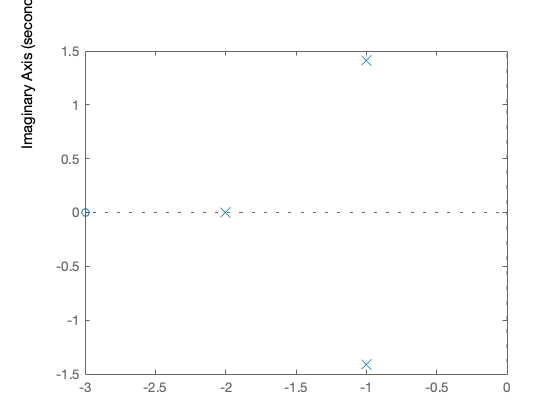

In [18]:
Nx = [3 9]; Dx = conv([1 2],[1 2 3]) % coefficients in descending powers of s
Zeros = roots(Nx)
Poles = roots(Dx) % Note the roots are complex!
K = 3
pzmap(Poles,Zeros)

## Next Time

We move on to consider 

* {ref}`unit4.2`

## References

```{bibliography}
:filter: docname in docnames
```